<a href="https://colab.research.google.com/github/tsvoronos/API202-students/blob/main/section-KP/section1-KP-answers-class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API-202M ABC SECTION #1
###### TF: Kelsey Pukelis

**I - INSTRUCTIONS**  

1. **Create a copy of this Jupyter notebook in your own drive by clicking `Copy to Drive` in the menubar (this is explained below in more detail below) - *if you do not do this your work will not be saved!***
    1. Remember to save your work frequently by pressing `command-S` or clicking `File > Save` in the menubar.
    1. We recommend completing this in Google Chrome.

## Part I: regression by hand (and in reverse)

Hint: Note that the following formulas apply:

$\hat \beta_1 = \frac{\Delta Y }{\Delta X}$ (Change in Y divided by Change in X)

$\hat u_i = Y_i - \hat Y_i $ (The residual for each observation)

*Note: You may use R to do the calculations as long as you do not use the built-in regression function. Alternatively, you can calculate them by hand or using Excel.*

**0a. Write the Sample Regression Function for generic variables $X$ and $Y$ (the version without a residual).**

Your Answer Here

**0b. Rearrange the equation above to have an equation: $\hat{\beta}_0 = $ ...**

Your Answer Here 



*Note: You may find it especially helpful for the rest of this exercise to hand-draw a picture.*

Suppose you were given two points on a regression line:

$$
(X_A,\hat{Y}_A) = (2,2)
$$

$$
(X_B,\hat{Y}_B) = (4,3)
$$



**1. Calculate $\hat{\beta}_1$.**

In [ ]:
# Code block for calulations


**2. Calculate $\hat{\beta_0}$.**

In [ ]:
# Code block for calculations


Suppose someone tells you that there is a third observation, where $X_C = 7$ 

**3. Calculate $\hat{Y}_C$.**

In [ ]:
# Code block for calculations


Now suppose someone gives you 3 points from the actual, observed data: 

$$
(X_A,Y_A) = (2,1)
$$
$$
(X_B,Y_B) = (4,5)
$$
$$
(X_C,Y_C) = (7,3.5)
$$


**4. Calculate $\hat{u}_A$, $\hat{u}_B$, and $\hat{u}_C$.**

In [ ]:
# Code block for calculations


## Part II: Data exercise

For this problem, we will be looking at data you may have seen before on income mobility in the U.S. 

For more information, see the paper ["The Opportunity Atlas: Mapping the Childhood Roots of Social Mobility"](https://opportunityinsights.org/paper/the-opportunity-atlas/) by Raj Chetty, Nathaniel Hendren, John Friedman, Maggie R. Jones, and Sonya R. Porter. (Looking at this resource is not necessary for completing the problem, but you may find it interesting or helpful for articulating interpretations.)

In particular, we will be working to replicate Figure I, Panel B in this [academic paper](https://opportunityinsights.org/wp-content/uploads/2018/10/atlas_paper.pdf). (The numbers will be slightly different because we are plotting for all genders, not just men.)

## Load `R` libraries and data

**Please refer to Sheet 1 in this [R Cheat Sheet](https://bit.ly/HKS-R) which includes the commands you learned last semester in addition to a number of additional ones.**

The code cell below imports the R tidyverse and creates a dataframe that we will be using for the next exercise. Make sure to run it before starting the problem!

*Note: Click the "play" button that appears when you hover over a cell to run it. The first time you do this you may receive an alert that this notebook was not authored by Google. If so, click "Run anyway" to proceed.*

In [1]:
#suppress warnings
options(warn = -1,dplyr.summarise.inform=FALSE)

#load packages
library(tidyverse)
library(broom)
library(ggplot2)

# load data
mobility_all <- read.csv('https://opportunityinsights.org/wp-content/uploads/2018/10/national_percentile_outcomes.csv')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# run this to select only the variables in the data we will be working with
mobility <- mobility_all %>% 
  select(par_pctile,(starts_with("jail") & ends_with("_pooled")))

Here is a description of each variable in our shortened dataset:

*   ``par_pctile``: Parent Income Rank in National Income Distribution. 
*   ``jail_pooled_pooled``: Fraction incarcerated on April 1st, 2010 (where incarceration is defined as residing in a federal detention center, federal prison, state prison, local jail, residential correctional facility, military jail, or juvenile correctional facility). The first "pooled" label means the data represents all races. The second "pooled" label means because the data represents all genders.
*   ``jail_[race]_pooled``: Fraction incarcerated on April 1st, 2010 for that race/ethnicity group. (Like above, the last "pooled" means these data represents all genders.)

(Here is the  [codebook](https://opportunityinsights.org/wp-content/uploads/2019/07/Codebook-for-Table-7.pdf) for the full data, if you're curious.)

In [ ]:
# take a look at the first few observations of the data
head(mobility)


,par_pctile,jail_pooled_pooled,jail_asian_pooled,jail_black_pooled,jail_hisp_pooled,jail_natam_pooled,jail_other_pooled,jail_white_pooled
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.05587,0.004098,0.10430,0.03499,0.07073,0.02007,0.03733
2,2,0.05033,0.003936,0.09618,0.03290,0.05996,0.01597,0.03464
3,3,0.04627,0.004104,0.08644,0.02931,0.06418,0.01906,0.03460
4,4,0.04445,0.004954,0.08586,0.02776,0.05662,0.01667,0.03246
5,5,0.04172,0.004271,0.08046,0.02634,0.04995,0.01573,0.03146
6,6,0.04048,0.003178,0.08032,0.02490,0.05258,0.01598,0.02974


In [8]:
#nrow(mobility)
#table(mobility$par_pctile)
#max(mobility$par_pctile)
#mobility
tail(mobility)

,par_pctile,jail_pooled_pooled,jail_asian_pooled,jail_black_pooled,jail_hisp_pooled,jail_natam_pooled,jail_other_pooled,jail_white_pooled
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
95,95,0.002150,NA,0.010190,0.003350,NA,NA,0.001916
96,96,0.002090,NA,0.011960,NA,NA,NA,0.001875
97,97,0.001797,NA,0.009026,0.002624,NA,NA,0.001628
98,98,0.001654,NA,0.009444,0.003226,NA,0.002812,0.001455
99,99,0.001410,NA,0.011170,NA,NA,NA,0.001338
100,100,0.001323,NA,0.013650,NA,NA,NA,0.001234



**Let's start out with familiarizing ourselves with the interpretation of the variable for Parent Income Rank** (``par_pctile``).

A. A rank of 1 mean means that a parent was **very poor**. In particular, they were in the lowest percentile of the national income distribution.

B. A rank of 99 mean means that a parent was **very rich**. In particular, they were in the highest percentile of the national income distribution.

C. A rank of 50 mean means that a parent was **in the middle** of the national income distribution. In particular, they were at the median.

**Convert the ``jail_`` variables from fractions to percents, to ease interpretations.**

In [9]:
mobility_pct <- mobility %>% 
  mutate(jail_pooled_pooled = jail_pooled_pooled*100) %>% 
  mutate(jail_asian_pooled = jail_asian_pooled*100) %>% 
  mutate(jail_black_pooled = jail_black_pooled*100) %>% 
  mutate(jail_hisp_pooled = jail_hisp_pooled*100) %>% 
  mutate(jail_natam_pooled = jail_natam_pooled*100) %>% 
  mutate(jail_other_pooled = jail_other_pooled*100) %>% 
  mutate(jail_white_pooled = jail_white_pooled*100)
head(mobility)
head(mobility_pct)

,par_pctile,jail_pooled_pooled,jail_asian_pooled,jail_black_pooled,jail_hisp_pooled,jail_natam_pooled,jail_other_pooled,jail_white_pooled
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.05587,0.004098,0.10430,0.03499,0.07073,0.02007,0.03733
2,2,0.05033,0.003936,0.09618,0.03290,0.05996,0.01597,0.03464
3,3,0.04627,0.004104,0.08644,0.02931,0.06418,0.01906,0.03460
4,4,0.04445,0.004954,0.08586,0.02776,0.05662,0.01667,0.03246
5,5,0.04172,0.004271,0.08046,0.02634,0.04995,0.01573,0.03146
6,6,0.04048,0.003178,0.08032,0.02490,0.05258,0.01598,0.02974


,par_pctile,jail_pooled_pooled,jail_asian_pooled,jail_black_pooled,jail_hisp_pooled,jail_natam_pooled,jail_other_pooled,jail_white_pooled
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,5.587,0.4098,10.430,3.499,7.073,2.007,3.733
2,2,5.033,0.3936,9.618,3.290,5.996,1.597,3.464
3,3,4.627,0.4104,8.644,2.931,6.418,1.906,3.460
4,4,4.445,0.4954,8.586,2.776,5.662,1.667,3.246
5,5,4.172,0.4271,8.046,2.634,4.995,1.573,3.146
6,6,4.048,0.3178,8.032,2.490,5.258,1.598,2.974


## All races

**1. Create a scatter plot showing the relationship between incarceration rates and parent income rank for the whole sample (all races and genders).**

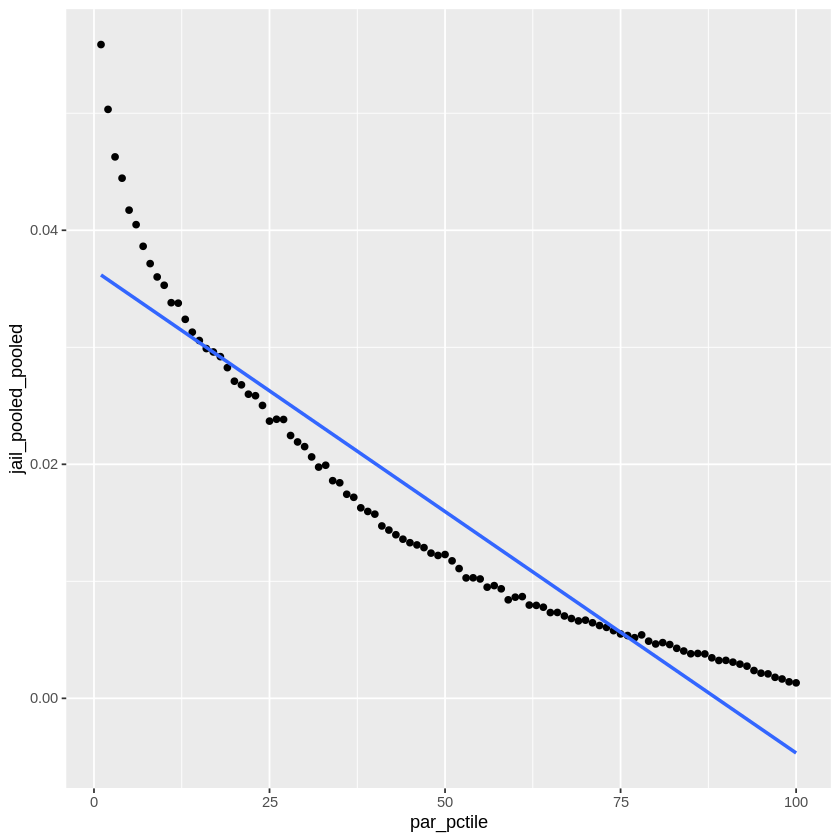

In [19]:
# Your Answer Here
#ggplot(data = mobility,aes(x = par_pctile, y = jail_pooled_pooled)) + geom_point()
base_plot <- mobility %>%
  ggplot(aes(x = par_pctile, y = jail_pooled_pooled)) + geom_point()
#base_plot

base_plot + geom_smooth(method = "lm", formula = y ~ x, se = FALSE)

**2. Comment on this "scatter" plot. For example, you might consider whether the relationship appears linear, whether this looks like a "scatter" plot, and on the correlation of these variables. What is your takeaway about the relationship between parental income and incarceration rates?**

Your Answer Here

**3. Overlay a linear regression line to your plot. Comment on the fit of this regression line to the data.**


In [ ]:
# Your Answer Here


Your Answer Here

**4. Run a linear regression of incarceration rate on parental income rank. Interpret the coefficients and comment on their statistical significance.**

In [24]:
# Your Answer Here
#fit <- lm(jail_pooled_pooled ~ par_pctile,data = mobility)
fit <-  lm(jail_pooled_pooled ~ par_pctile, data = mobility_pct)
summary(fit)


Call:
lm(formula = jail_pooled_pooled ~ par_pctile, data = mobility_pct)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4944 -0.3486 -0.1082  0.2401  1.9691 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.659181   0.088678   41.26   <2e-16 ***
par_pctile  -0.041263   0.001525  -27.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4401 on 98 degrees of freedom
Multiple R-squared:  0.882,	Adjusted R-squared:  0.8808 
F-statistic: 732.6 on 1 and 98 DF,  p-value: < 2.2e-16


Your Answer Here

**5. Divide the sample into "rich" and "poor" families by defining your own cutoff point. (Note: solutions will use the median, where the "rich" group includes the median.) Estimate two regressions of incarceration rates on parental income rank separately: one regression for "poor" and one regression for "rich" children. How do the coefficients differ between the two groups?**

In [27]:
# Your Answer Here
mobility_pct <- mobility_pct %>%
  mutate(poor = par_pctile<50)
head(mobility_pct)
tail(mobility_pct)

# poor group only
mobility_poor <- mobility_pct %>% filter(poor == TRUE)
fit_poor <- lm(jail_pooled_pooled ~ par_pctile,data = mobility_poor)
summary(fit_poor)

# rich group only
mobility_rich <- mobility_pct %>% filter(poor == FALSE)
fit_rich <- lm(jail_pooled_pooled ~ par_pctile,data = mobility_rich)
summary(fit_rich)

,par_pctile,jail_pooled_pooled,jail_asian_pooled,jail_black_pooled,jail_hisp_pooled,jail_natam_pooled,jail_other_pooled,jail_white_pooled,poor
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,1,5.587,0.4098,10.430,3.499,7.073,2.007,3.733,TRUE
2,2,5.033,0.3936,9.618,3.290,5.996,1.597,3.464,TRUE
3,3,4.627,0.4104,8.644,2.931,6.418,1.906,3.460,TRUE
4,4,4.445,0.4954,8.586,2.776,5.662,1.667,3.246,TRUE
5,5,4.172,0.4271,8.046,2.634,4.995,1.573,3.146,TRUE
6,6,4.048,0.3178,8.032,2.490,5.258,1.598,2.974,TRUE


,par_pctile,jail_pooled_pooled,jail_asian_pooled,jail_black_pooled,jail_hisp_pooled,jail_natam_pooled,jail_other_pooled,jail_white_pooled,poor
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
95,95,0.2150,NA,1.0190,0.3350,NA,NA,0.1916,FALSE
96,96,0.2090,NA,1.1960,NA,NA,NA,0.1875,FALSE
97,97,0.1797,NA,0.9026,0.2624,NA,NA,0.1628,FALSE
98,98,0.1654,NA,0.9444,0.3226,NA,0.2812,0.1455,FALSE
99,99,0.1410,NA,1.1170,NA,NA,NA,0.1338,FALSE
100,100,0.1323,NA,1.3650,NA,NA,NA,0.1234,FALSE



Call:
lm(formula = jail_pooled_pooled ~ par_pctile, data = mobility_poor)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27202 -0.16982 -0.08299  0.07822  1.23827 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.421633   0.082394   53.66   <2e-16 ***
par_pctile  -0.072901   0.002869  -25.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.284 on 47 degrees of freedom
Multiple R-squared:  0.9322,	Adjusted R-squared:  0.9307 
F-statistic: 645.9 on 1 and 47 DF,  p-value: < 2.2e-16


Your Answer Here

**Bonus: plot the points and two regression lines separately by the variable indicating "poor" or "rich" families that you just created.**

In [ ]:
# Your Answer Here


## By race

**6. Now plot the relationship between incarceration rates and parental income rank for at least two race/ethnicity groups of your choosing. (Note: The solutions will include all race/ethnicity groups.)**

In [ ]:
# Your Answer Here


**7. Comment on the results of this graph.**

Your Answer Here